In [18]:
import pandas as pd

#carregando as tabelas
safra_2018 = pd.read_csv('Safra_2018-2019.csv')
safra_2020 = pd.read_csv('Safra_2020.csv')

#os dados contém NaN, que deverão ser preechidos com 0
safra_2018 = safra_2018.fillna(0)
safra_2020 = safra_2020.fillna(0)

#visualizando a tabela de 2018-2019 para conhecer os dados
safra_2018.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


In [19]:
#visualizando a tabela de 2020 para conhecer os dados
safra_2020.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2
3,80003,SCROP80004,283,0,1,2,15,0.0,7,2
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1


In [20]:
#para predizer utilizarei o algoritmo de classificação dos K Vizinhos mais Próximos (K-Nearest Neighbors [KNN]) da biblioteca scikit
#primeiro importando a função para separar o conjunto de treino e teste, que sairá a partir da tabela de 2018-2019
from sklearn.model_selection import train_test_split
#importando a classe do classificador KNN
from sklearn.neighbors import KNeighborsClassifier

#separando a tabela em caracteristicas e alvos (features and targets)
X = safra_2018.iloc[:, 2:10] #as caracteristicas são todos os dados exceto o identificador e o alvo
Y = safra_2018['dano_na_plantacao'] #o alvo são os valores que queremos predizer


In [21]:
#aqui separamos os dados em treino e teste, para checar a precisão do classificador
x_train, x_test, y_train, y_test = train_test_split(X, Y) #por padrão o treino terá 75% dos dados e o teste terá 25%, que são os valores mais adequados
#instanciando a classe do classificador
knn = KNeighborsClassifier(n_neighbors= 31) 
#o número padrão da função para o número de vizinhos que encontrar é de 5, mas quanto mais melhor, e de preferência um número primo para que a decisão seja facilitada 
# (não haverão empates pois por padrão é escolhido o que tiver maior número de ocorrências)

#treinando o modelo preditivo
knn.fit(x_train, y_train)

#checando a precisão do classificador
knn.score(x_test, y_test)

0.8376

In [22]:
#Dada a precisão, agora será predita tabela de 2020
#pegando as caracteristicas da safra de 2020
X_2020 = safra_2020.iloc[:,2:]
#predizendo e pondo na coluna dano_na_plantacao
safra_2020['dano_na_plantacao'] = knn.predict(X_2020)


In [23]:
#visualizando a tabela
safra_2020.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1,0
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1,0
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2,0
3,80003,SCROP80004,283,0,1,2,15,0.0,7,2,0
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1,0


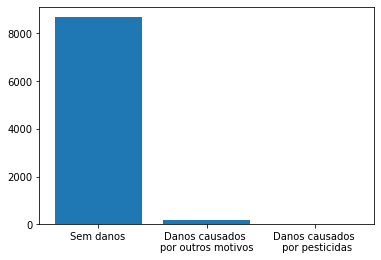

In [24]:
#demonstrando num gráfico de barras quantas não serão prejudicadas, quantas terão danos causados por outros motivos e quantas por pesticidas
#%matplotlib notebook
import matplotlib.pyplot as plt
#contando quantas ocorrencias de cada um
bars = safra_2020['dano_na_plantacao'].value_counts()
#plotando o grafico por fim
plt.bar(bars.index, bars.values, tick_label = ['Sem danos', 'Danos causados \npor outros motivos', 'Danos causados \n por pesticidas']);


In [25]:
bars

0    8683
1     174
2       1
Name: dano_na_plantacao, dtype: int64